In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

In [2]:
truth = './data/processed/truth.txt'
pred = './data/processed/predictions.txt'

df_truth = pd.read_csv(truth, header=None, names=['class'])
df_pred = pd.read_csv(pred, header=None, names=['class'])

In [3]:
df_truth, df_pred

(   class
 0   Jedi
 1   Jedi
 2   Sith
 3   Sith
 4   Jedi
 ..   ...
 95  Sith
 96  Sith
 97  Sith
 98  Jedi
 99  Sith
 
 [100 rows x 1 columns],
    class
 0   Sith
 1   Sith
 2   Jedi
 3   Sith
 4   Jedi
 ..   ...
 95  Sith
 96  Jedi
 97  Jedi
 98  Sith
 99  Jedi
 
 [100 rows x 1 columns])

In [4]:
df_pred_2 = df_pred.copy()


In [5]:
def generate_confusion_matrix(truth, pred, true_label, negative_label):
    confusion_matrix = np.array([
        [0, 0],
        [0, 0]
    ])

    for i in range(len(truth)):
        if truth['class'][i] == true_label and pred['class'][i] == true_label: # TP
            confusion_matrix[0][0] += 1
        elif truth['class'][i] == negative_label and pred['class'][i] == negative_label: # TN
            confusion_matrix[1][1] += 1
        elif truth['class'][i] == true_label and pred['class'][i] == negative_label: # FP
            confusion_matrix[0][1] += 1
        elif truth['class'][i] == negative_label and pred['class'][i] == true_label: # FN
            confusion_matrix[1][0] += 1

    return confusion_matrix

def generate_metrics(confusion_matrix):
    TP = confusion_matrix[0][0]
    TN = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    precision = float(f'{TP / (TP + FP):.2f}')
    recall = float(f'{TP / (TP + FN):.2f}')
    f1_score = float(f'{2 * (precision * recall) / (precision + recall):.2f}')
    accuracy = float(f'{(TP + TN) / (TP + TN + FP + FN):.2f}')

    return precision, recall, f1_score, accuracy



In [6]:
j_confusion_matrix = generate_confusion_matrix(df_pred, df_truth, 'Jedi', 'Sith')
s_confusion_matrix = generate_confusion_matrix(df_pred, df_truth, 'Sith', 'Jedi')

j_precision, j_recall, j_f1_score, j_accuracy = generate_metrics(j_confusion_matrix)
s_precision, s_recall, s_f1_score, s_accuracy = generate_metrics(s_confusion_matrix)

j_total = len(df_truth[df_truth['class'] == 'Jedi'])
s_total = len(df_truth[df_truth['class'] == 'Sith'])

In [7]:
df_metrics = pd.DataFrame({
    'precision': [j_precision, s_precision],
    'recall': [j_recall, s_recall],
    'f1_score': [j_f1_score, s_f1_score],
    'total': [j_total, s_total],
}, index=['Jedi', 'Sith'])

df_metrics.loc['Accuracy'] = ['', '', j_accuracy, j_total + s_total]
print(df_metrics)

confusion_matrix = generate_confusion_matrix(df_truth, df_pred, 'Jedi', 'Sith')
print(confusion_matrix)

# [[25 24]
# [30 21]]

         precision recall  f1_score  total
Jedi          0.45   0.51      0.48     49
Sith          0.47   0.41      0.44     51
Accuracy                       0.46    100
[[25 24]
 [30 21]]


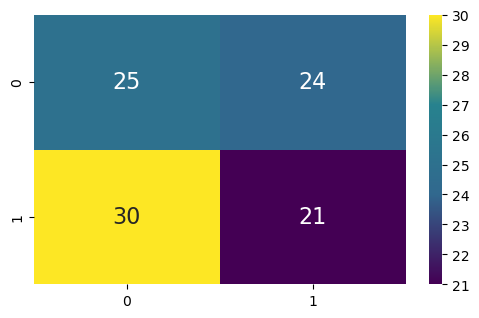

In [8]:
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", ['#440054', '#31688E', '#27828E', '#FDE724'])

plt.figure(figsize=(6, 3.5))
sns.heatmap(confusion_matrix, annot=True, annot_kws={
  'size': 16
}, cmap=custom_cmap)
plt.show()

### Ex01

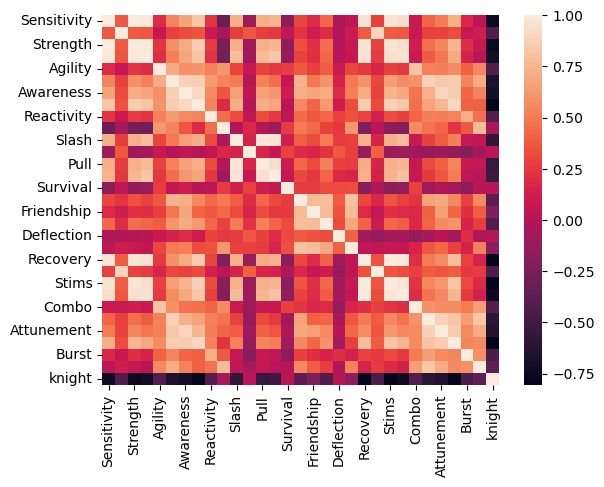

In [45]:
train_knight = pd.read_csv('./knights/Training_knight.csv')
train_knight_copy = train_knight.copy()
train_knight_copy['knight'] = train_knight_copy['knight'].astype('category').cat.codes
correlation_matrix = train_knight_copy.corr()

sns.heatmap(correlation_matrix)
plt.show()

### Ex02

Variances (Percentage):
 [4.59653736e+01 1.72033888e+01 9.93990642e+00 6.34399250e+00
 4.64558497e+00 3.80373476e+00 2.43882089e+00 1.76698560e+00
 1.44365534e+00 1.18705207e+00 9.85371385e-01 9.29398888e-01
 7.58131289e-01 6.61298968e-01 4.08491854e-01 2.63871518e-01
 2.48151105e-01 2.03253859e-01 1.69038301e-01 1.40960037e-01
 1.14318171e-01 1.05017561e-01 7.18402053e-02 6.05654796e-02
 5.26622539e-02 4.59216497e-02 2.00776188e-02 1.61206995e-02
 4.87932005e-03 1.78268309e-03 3.52225091e-04]

Cumulative Variances (Percentage):
[ 45.9653736   63.16876239  73.1086688   79.45266131  84.09824628
  87.90198104  90.34080193  92.10778753  93.55144286  94.73849493
  95.72386632  96.6532652   97.41139649  98.07269546  98.48118731
  98.74505883  98.99320994  99.1964638   99.3655021   99.50646213
  99.6207803   99.72579786  99.79763807  99.85820355  99.9108658
  99.95678745  99.97686507  99.99298577  99.99786509  99.99964777
 100.        ]


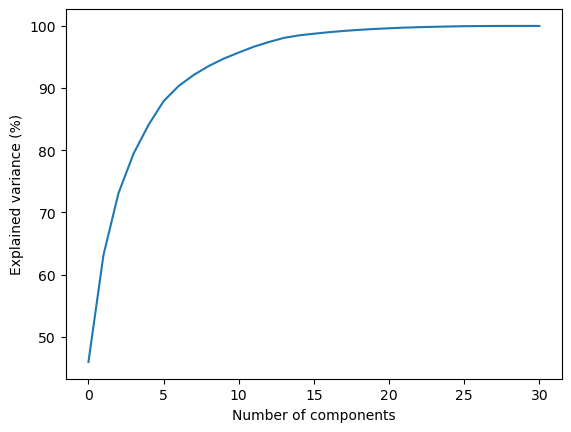

In [68]:
train_knight_scaled = (train_knight_copy - train_knight_copy.mean()) / train_knight_copy.std()

pca = PCA()
pca.fit_transform(train_knight_scaled)

variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(variances)

np.set_printoptions(suppress=False)
print(f"Variances (Percentage):\n {variances * 100}\n")
print(f"Cumulative Variances (Percentage):\n{cumulative_variances * 100}")

plt.plot(cumulative_variances * 100)
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.show()